# --Titanic Survived project--
# C SOMA SEKHAR GOUD
# Batch.No: DS2307

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [91]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Survived:1
* Not survived:0

## Data Analysis & Pre-processing

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [93]:
# checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* So we have null values in 3 attributes Age(177),Cabin(687),Embarked(2)

In [107]:
#we have lot of missing values in "Cabin".
df = df.drop('Cabin', axis=1)


### Dealing with missing values

* Numeric case: we will replace the NaN  with MEAN value of the repective attribuite

* Categorical case: We shall use MODE and replace the NaN values

In [94]:
#Finding Mean
x_Age=df['Age'].mean()

#Filling NaN values with Mean X
df['Age'].fillna(x_Age, inplace=True)


In [95]:
#Finding Mode
df['Embarked'].mode()[0]

'S'

* We shall replace with 'S'

In [96]:
df['Embarked'].fillna('S', inplace =True)

In [97]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [98]:
# Create a new column 'Survival Status' to distinguish survivors from non-survivors
df['Survival Status'] = df['Survived'].map({1: 'Survived', 0: 'Not Survived'})

# Create a bar plot for Survived and Not Survived passengers by gender
fig = px.bar(
    df, x='Sex', color='Survival Status',
    title='Survivors and Non-Survivors by Gender',
    labels={'Sex': 'Gender'},
    barmode='group'  # This groups the bars for Survived and Not Survived
)
fig.show()


In [99]:
# Plot for 'Pclass'
fig2 = px.bar(df['Pclass'].value_counts().reset_index(), x='index', y='Pclass')
fig2.update_layout(title="Passenger Class Distribution")

# Plot for 'Embarked'
fig3 = px.bar(df['Embarked'].value_counts().reset_index(), x='index', y='Embarked')
fig3.update_layout(title="Embarkation Port Distribution")

fig2.show()
fig3.show()


In [100]:
# Create a grouped bar plot for Pclass vs Fare, with Survived/Not Survived side by side
fig = px.bar(
    df, x='Pclass', y='Fare', color='Survival Status',
    title='Pclass vs Fare (Survived/Not Survived)',
    labels={'Fare': 'Count', 'Pclass': 'Passenger Class'},
    barmode='group'  # This creates side-by-side bars for Survived/Not Survived
)

fig.show()



In [101]:
# Create a bar plot for 'Embarked' vs count of passengers with 'Fare' values on the y-axis
fig = px.bar(
    df, x='Pclass', y='Fare', title='Pclass vs Fare (Count of Passengers)',
    labels={'Fare': 'Count', 'Pclass': 'Pclass'},
    text='Fare'  # Display Fare values on the bars
)

fig.show()



* Fare price for calss 1 is high and with most passengers as well

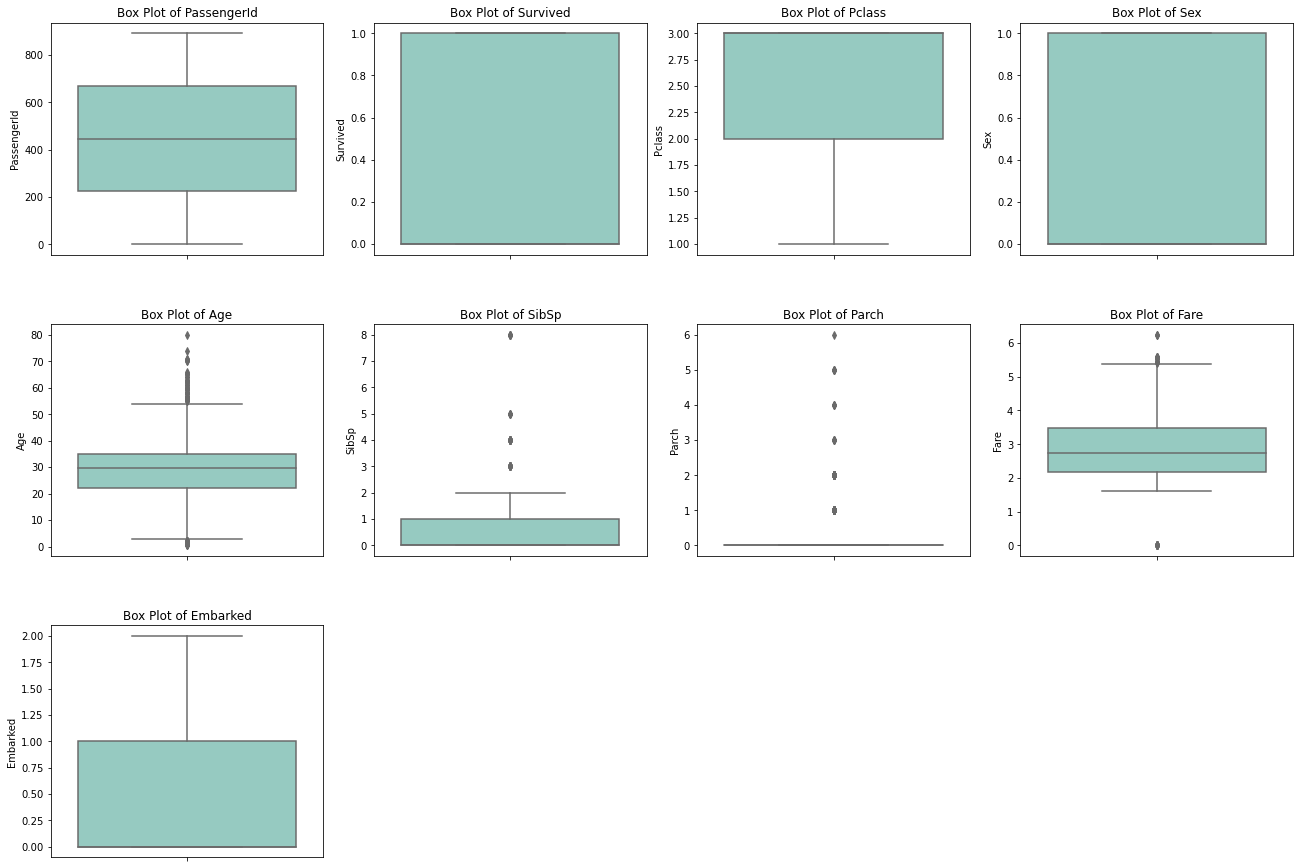

In [120]:
# Select only the numeric columns for box plots
numeric_columns = df.select_dtypes(include=['number'])

# List of numeric attribute names
numeric_attribute_names = numeric_columns.columns

# Figure size
plt.figure(figsize=(18, 12))

# Create individual box plots for each numeric attribute
for i, attribute in enumerate(numeric_attribute_names):
    plt.subplot(3, 4, i + 1)  # Create subplots in a 3x4 grid
    sns.boxplot(data=df, y=attribute, palette="Set3")
    plt.title(f"Box Plot of {attribute}")

# Adjust the layout
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()


<AxesSubplot:xlabel='Age', ylabel='Density'>

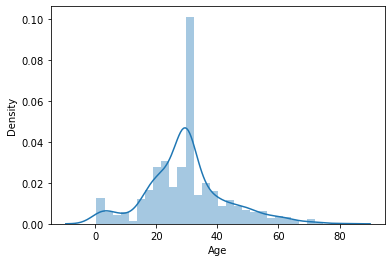

In [102]:
sns.distplot(df['Age'])

* It's a bell curve and is uniformly distributed so nothing to modify

<AxesSubplot:xlabel='Fare', ylabel='Density'>

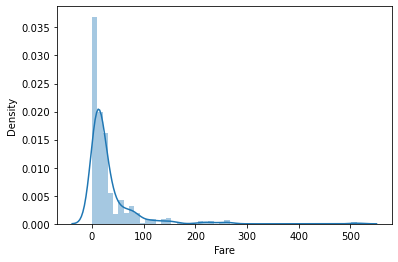

In [103]:
sns.distplot(df['Fare'])

* This is Right-skewed, we will balance it with the help of Log Transformation 

In [104]:
#Log transformation
df['Fare'] = np.log1p(df['Fare'])  # Using np.log1p to handle zero values

<AxesSubplot:xlabel='Fare', ylabel='Density'>

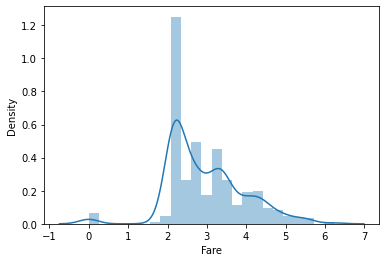

In [105]:
sns.distplot(df['Fare'])

## Correlation matrix

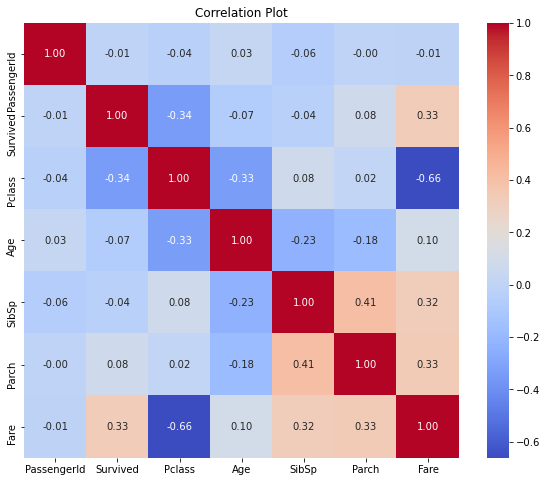

In [106]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Plot")
plt.show()

In [ ]:
We will 

In [109]:
# Count and display unique values of 'Sex'
unique_sex_values = df['Sex'].value_counts()
print("Unique values of 'Sex':")
print(unique_sex_values)

# Count and display unique values of 'Embarked'
unique_embarked_values = df['Embarked'].value_counts()
print("\nUnique values of 'Embarked':")
print(unique_embarked_values)


Unique values of 'Sex':
male      577
female    314
Name: Sex, dtype: int64

Unique values of 'Embarked':
S    646
C    168
Q     77
Name: Embarked, dtype: int64


### Categorical encoding

In [110]:
# Replace values in the 'Sex' column
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

# Replace values in the 'Embarked' column
df['Embarked'] = df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})


In [114]:
#we shall drop columns to avoid attributes which have no use. 
df_t = df.drop(['PassengerId','Name', 'Ticket','Survival Status'], axis=1)
df_t

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,2.110213,0
1,1,1,1,38.000000,1,0,4.280593,1
2,1,3,1,26.000000,0,0,2.188856,0
3,1,1,1,35.000000,1,0,3.990834,0
4,0,3,0,35.000000,0,0,2.202765,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,2.639057,0
887,1,1,1,19.000000,0,0,3.433987,0
888,0,3,1,29.699118,1,2,3.196630,0
889,1,1,0,26.000000,0,0,3.433987,1


* Assigining values

In [125]:
X = df_t.drop(columns=['Survived'], axis =1)
y = df_t['Survived']

In [126]:
X


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,2.110213,0
1,1,1,38.000000,1,0,4.280593,1
2,3,1,26.000000,0,0,2.188856,0
3,1,1,35.000000,1,0,3.990834,0
4,3,0,35.000000,0,0,2.202765,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,2.639057,0
887,1,1,19.000000,0,0,3.433987,0
888,3,1,29.699118,1,2,3.196630,0
889,1,0,26.000000,0,0,3.433987,1


In [128]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


## Splitting into Train-Test data

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2)

### Model building

In [166]:
# Finding the random state
def find_best_random_state(X, y, model, test_size=0.3, max_random_state=200):
    max_acc = 0
    best_random_state = 0

    for random_state in range(1, max_random_state):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)
        
        accuracy = accuracy_score(y_test, predictions)
        
        if accuracy > max_acc:
            max_acc = accuracy
            best_random_state = random_state

    return max_acc, best_random_state

# Initialize variables to store random state values
rfc_rs = dtc_rs = lr_rs = None

# Loop through each classifier
for classifier in classifiers:
    best_accuracy, best_random_state = find_best_random_state(X, y, classifier)
    print(f"Best accuracy for {classifier.__class__.__name__} is {best_accuracy} at random state {best_random_state}")
    
    # Assign the random state value to the respective variable
    if isinstance(classifier, RandomForestClassifier):
        rfc_rs = best_random_state
    elif isinstance(classifier, DecisionTreeClassifier):
        dtc_rs = best_random_state
    elif isinstance(classifier, LogisticRegression):
        lr_rs = best_random_state

Best accuracy for RandomForestClassifier is 0.8507462686567164 at random state 19
Best accuracy for DecisionTreeClassifier is 0.8208955223880597 at random state 191
Best accuracy for LogisticRegression is 0.8507462686567164 at random state 6


In [168]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def classify(model, X, y, best_random_state=None):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=best_random_state)
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions for the test set
    y_pred = model.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy * 100)
    
      # Cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print("CV Score:", np.mean(score) * 100)
    
    print('Difference b/w Accuracy & Cross Validation score is:', accuracy-np.mean(score))

    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Classification Report
    class_report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(class_report)

### DecisionTreeClassifier

In [169]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y,dtc_rs)

Accuracy: 80.59701492537313
CV Score: 77.7835666310966
Difference b/w Accuracy & Cross Validation score is: 0.028134482942765326
Confusion Matrix:
[[139  27]
 [ 25  77]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       166
           1       0.74      0.75      0.75       102

    accuracy                           0.81       268
   macro avg       0.79      0.80      0.79       268
weighted avg       0.81      0.81      0.81       268



### Random Forest Classifier

In [170]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y,rfc_rs)

Accuracy: 83.95522388059702
CV Score: 81.37091205825119
Difference b/w Accuracy & Cross Validation score is: 0.025843118223458195
Confusion Matrix:
[[147  19]
 [ 24  78]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       166
           1       0.80      0.76      0.78       102

    accuracy                           0.84       268
   macro avg       0.83      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268



### Logistic Regression

In [171]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y,lr_rs)

Accuracy: 85.07462686567165
CV Score: 78.45207457158997
Difference b/w Accuracy & Cross Validation score is: 0.06622552294081674
Confusion Matrix:
[[159  15]
 [ 25  69]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       174
           1       0.82      0.73      0.78        94

    accuracy                           0.85       268
   macro avg       0.84      0.82      0.83       268
weighted avg       0.85      0.85      0.85       268



## So among the above "_RandomForestClassifier_" is best suitable model

## _Hyper parameter Tuining_

In [172]:
from sklearn.model_selection import GridSearchCV
param_grid = {
        'criterion':['gini', 'entropy'],
        'min_samples_split': [2, 5, 10, 15],
        'max_depth': [0, 10, 20],    
        'min_samples_leaf': [1, 2, 4, 8],  
        'random_state': [10, 50, 1000]
    }

In [173]:
GCV = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5)
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 15],
                         'random_state': [10, 50, 1000]})

In [174]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'random_state': 10}

In [175]:
best_tree = RandomForestClassifier(**GCV.best_params_)

# Perform cross-validation to calculate accuracy
accuracy_scores = cross_val_score(best_tree, X, y, cv=5, scoring='accuracy')

# Calculate the mean accuracy from cross-validation
mean_accuracy = accuracy_scores.mean()

print("Mean accuracy for the best hyperparameters:", mean_accuracy)

Mean accuracy for the best hyperparameters: 0.8238403113426653


In [176]:
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameter grid
param_dist = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10, 15],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_leaf': [1, 2, 4, 8],
    'random_state': [10, 50, 1000]
}

# Create the RandomForestClassifier
clf = RandomForestClassifier()

# Create a Randomized Search Cross-Validation object
random_search = RandomizedSearchCV(
    clf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1
)

# Perform the Randomized Search
random_search.fit(X, y)

# Print the best hyperparameters and corresponding accuracy
print("Best hyperparameters: ", random_search.best_params_)
print("Best accuracy: ", random_search.best_score_)


Best hyperparameters:  {'random_state': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'criterion': 'entropy'}
Best accuracy:  0.837298349130626


### So Based on the results we will go with hyperparameters by  Randomized Search method

In [177]:
# Define a RandomForestClassifier with RandomizedSearchCV hyperparameters
best_model = RandomForestClassifier(
    criterion='entropy',
    max_depth=20,
    min_samples_leaf=2,
    min_samples_split=5,
    random_state=1000
)

# Fit the model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
pred = best_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 80.97%


In [178]:
import pickle

# Specify the file path where you want to save the model
file_path = "Titanic_random_forest_model.pkl"

model = RandomForestClassifier()

# Save the model to a pickle file
with open(file_path, 'wb') as file:
    pickle.dump(best_model, file)